In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.datasets import make_blobs
from sklearn.impute import SimpleImputer

In [2]:
with open('/Users/travelingshoes/Desktop/final_project_github/Weather data/Morgan_Weather_Data.xlsx', 'r', encoding='utf-8', errors='ignore') as f:
    data = f.read()

# Read in data from CSV file
utah_data = pd.ExcelFile("Utah_co_Weather_Data.xlsx")

# Get the sheets
utah_data.sheet_names

['Sheet1']

In [3]:
# Get the morgan_info from the crowdfunding_info worksheet. 
utah_info_df = pd.read_excel(utah_data, sheet_name='Sheet1')
utah_info_df.head()

,Date,Utah Lake (10166500) % of Reservoir Capacity Start of Day Values,Dry = 0 Flooded =1 Not = 2,Cascade Mountain (1039) Snow Water Equivalent (in) Start of Day Values,Payson R.S. (686) Snow Water Equivalent (in) Start of Day Values,Santaquin Meadows (1280) Snow Water Equivalent (in) Start of Day Values,Timpanogos Divide (820) Snow Water Equivalent (in) Start of Day Values,UTAH SWE,springvilleTemp_Max (°F),springvilleTemp_min (°F),...,provoRain_sum (inch),provoSnowfall_sum (inch),provoWindspeed_10m_max (mp/h),American ForkTemp_Max (°F),American ForkTemp_min (°F),American ForkTemp_mean (°F),American ForkPrecipitation_sum (inch),American ForkRain_sum (inch),American ForkSnowfall_sum (inch),American ForkWindspeed_10m_max (mp/h)
0,1982-10-01,107,0,NaN,2.9,NaN,1.1,1.4,42.5,32.3,...,0.080,0.307,5.6,50.6,39.3,44.4,0.108,0.108,0.0,7.7
1,1982-10-02,108,0,NaN,2.7,NaN,1.1,1.4,52.4,32.4,...,0.000,0.000,4.3,58.6,37.2,47.7,0.000,0.000,0.0,6.5
2,1982-10-03,108,0,NaN,2.5,NaN,1.1,1.3,59.0,31.8,...,0.000,0.000,6.2,64.5,38.4,51.0,0.000,0.000,0.0,6.7
3,1982-10-04,108,0,NaN,2.4,NaN,1.1,1.3,61.7,34.7,...,0.008,0.000,8.3,68.4,42.0,54.1,0.122,0.122,0.0,11.7
4,1982-10-05,106,0,NaN,2.4,NaN,1.1,1.2,44.2,35.2,...,0.200,0.278,6.2,50.0,41.3,45.6,0.348,0.348,0.0,8.3


In [4]:
utah_drop_info_df = utah_info_df.dropna()
print(utah_drop_info_df)

            Date  \
12445 2016-10-27   
12446 2016-10-28   
12447 2016-10-29   
12448 2016-10-30   
12449 2016-10-31   
...          ...   
14787 2023-03-27   
14788 2023-03-28   
14789 2023-03-29   
14790 2023-03-30   
14791 2023-03-31   

       Utah Lake (10166500) % of Reservoir Capacity Start of Day Values  \
12445                                                 34                  
12446                                                 34                  
12447                                                 34                  
12448                                                 34                  
12449                                                 35                  
...                                                  ...                  
14787                                                 61                  
14788                                                 60                  
14789                                                 62                  
14790    

In [16]:
X = utah_drop_info_df[['Cascade Mountain (1039) Snow Water Equivalent (in) Start of Day Values', 'Payson R.S. (686) Snow Water Equivalent (in) Start of Day Values', 'Santaquin Meadows (1280) Snow Water Equivalent (in) Start of Day Values', 'Timpanogos Divide (820) Snow Water Equivalent (in) Start of Day Values', 'UTAH SWE', 'springvilleTemp_Max (°F)', 'springvilleTemp_min (°F)', 'provoRain_sum (inch)', 'provoSnowfall_sum (inch)', 'provoWindspeed_10m_max (mp/h)', 'American ForkTemp_Max (°F)', 'American ForkTemp_min (°F)', 'American ForkTemp_mean (°F)', 'American ForkPrecipitation_sum (inch)', 'American ForkRain_sum (inch)', 'American ForkSnowfall_sum (inch)', 'American ForkWindspeed_10m_max (mp/h)']]   
y = utah_drop_info_df[['Utah Lake (10166500) % of Reservoir Capacity Start of Day Values', 'Dry = 0 Flooded =1 Not = 2', 'Cascade Mountain (1039) Snow Water Equivalent (in) Start of Day Values']] 


In [17]:
#Training
X 

,Cascade Mountain (1039) Snow Water Equivalent (in) Start of Day Values,Payson R.S. (686) Snow Water Equivalent (in) Start of Day Values,Santaquin Meadows (1280) Snow Water Equivalent (in) Start of Day Values,Timpanogos Divide (820) Snow Water Equivalent (in) Start of Day Values,UTAH SWE,springvilleTemp_Max (°F),springvilleTemp_min (°F),provoRain_sum (inch),provoSnowfall_sum (inch),provoWindspeed_10m_max (mp/h),American ForkTemp_Max (°F),American ForkTemp_min (°F),American ForkTemp_mean (°F),American ForkPrecipitation_sum (inch),American ForkRain_sum (inch),American ForkSnowfall_sum (inch),American ForkWindspeed_10m_max (mp/h)
12445,0.0,0.0,0.0,0.0,0.1,67.9,37.6,0.000,0.000,7.5,74.5,43.7,58.0,0.000,0.000,0.000,12.8
12446,0.0,0.0,0.0,0.0,0.0,66.6,42.6,0.103,0.000,9.2,74.2,50.6,59.1,0.108,0.108,0.000,9.9
12447,0.0,0.0,0.0,0.0,0.0,61.2,43.9,0.064,0.000,7.4,68.8,48.3,57.3,0.103,0.103,0.000,10.4
12448,0.0,0.0,0.0,0.0,0.0,62.6,43.9,0.004,0.000,6.5,70.1,50.5,60.7,0.008,0.008,0.000,11.9
12449,0.0,0.0,0.0,0.0,0.0,51.4,39.2,0.398,0.056,5.2,60.4,46.4,52.2,0.295,0.295,0.000,10.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14787,37.7,30.0,33.2,46.7,26.8,25.1,12.6,0.000,0.305,5.0,31.0,19.6,24.2,0.080,0.000,0.554,5.2
14788,38.0,30.1,33.3,47.4,27.0,35.2,6.4,0.000,0.000,6.3,38.5,12.4,24.9,0.000,0.000,0.000,8.0
14789,38.0,30.1,33.3,47.4,27.0,42.8,18.7,0.016,0.221,9.0,46.1,25.0,35.1,0.157,0.153,0.028,14.1
14790,38.9,30.2,33.7,48.0,27.5,33.1,24.2,0.004,2.562,6.1,35.2,29.6,32.8,0.512,0.071,3.086,4.7


In [18]:
#Testing
y 

,Utah Lake (10166500) % of Reservoir Capacity Start of Day Values,Dry = 0 Flooded =1 Not = 2,Cascade Mountain (1039) Snow Water Equivalent (in) Start of Day Values
12445,34,0,0.0
12446,34,0,0.0
12447,34,0,0.0
12448,34,0,0.0
12449,35,0,0.0
...,...,...,...
14787,61,0,37.7
14788,60,0,38.0
14789,62,0,38.0
14790,56,0,38.9


In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [22]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7652288888542623
Testing Score: 0.7417982200706019


ValueError: could not broadcast input array from shape (2,) into shape (1,)

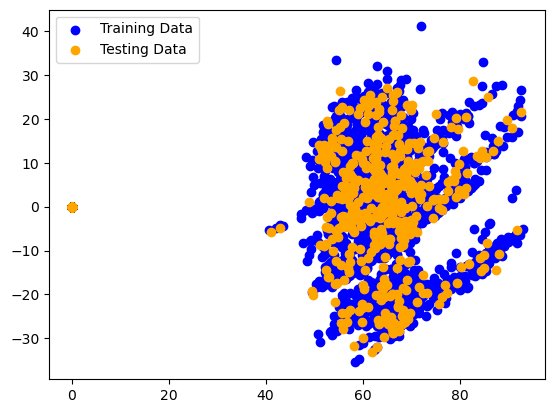

In [12]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()